In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
# Read data
heart = pd.read_csv('datasets/heart.csv')
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
# Dimensions of the data set
print(heart.shape)

(299, 13)


In [7]:
# Remove unusual rows of data
heart_mod = heart[(heart.diabetes != 0) & (heart.smoking != 0) & (heart.DEATH_EVENT != 0)]
# Dimensions of data set after cleansing
print(heart_mod.shape)
print(heart_mod.head())


(12, 13)
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
7   60.0        1                       315         1                 60   
25  80.0        0                       148         1                 38   
27  70.0        0                       122         1                 45   
29  82.0        0                        70         1                 30   
41  50.0        0                       124         1                 30   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
7                     0   454000.0               1.1           131    1   
25                    0   149000.0               1.9           144    1   
27                    1   284000.0               1.3           136    1   
29                    0   200000.0               1.2           132    1   
41                    1   153000.0               1.2           136    0   

    smoking  time  DEATH_EVENT  
7         1    10            1  
25        1    23

In [11]:
# Features/Response
feature_names = ['age', 'anaemia', 'creatinine_phosphokinase',
                 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
                 'sex', 'smoking', 'time', 'DEATH_EVENT']
X = heart_mod[feature_names]
#label heart_mod into y

y = 


AttributeError: 'DataFrame' object has no attribute 'label'

In [9]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [10]:
# Split the data into train and test sets
from cgi import test
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

NameError: name 'y' is not defined

K-Fold Cross Validation

In [ ]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7790525114155251


Model Evaluation Metrics

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


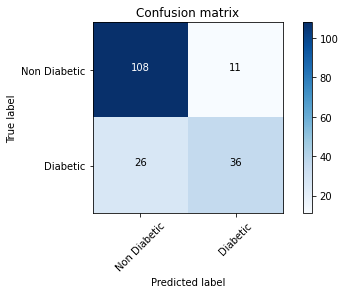

In [ ]:
plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [ ]:
# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0] 
# False Positives
FP = confusion[0, 1] 
# False Negatives
FN = confusion[1, 0] 

In [ ]:
from sklearn.metrics import recall_score, precision_score

Classification accuracy

In [ ]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


Sensitivity/Recall

In [ ]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


Specificity

In [ ]:
print(TN / float(TN + FP))

0.907563025210084


False Positive Rate


In [ ]:
print(FP / float(TN + FP))

0.09243697478991597


Precision

In [ ]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


Adjusting Classification Threshold

In [ ]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.80085377, 0.19914623],
       [0.70450063, 0.29549937],
       [0.81765257, 0.18234743],
       [0.45582948, 0.54417052],
       [0.32622925, 0.67377075],
       [0.79674719, 0.20325281],
       [0.74752722, 0.25247278],
       [0.64438483, 0.35561517],
       [0.62830673, 0.37169327],
       [0.69703945, 0.30296055]])

In [ ]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

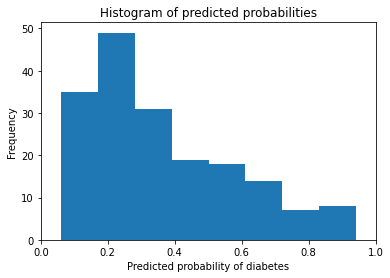

In [ ]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of heart disease')
plt.ylabel('Frequency')